<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-pandas,-os,-sys,-and-pprint-libraries" data-toc-modified-id="Import-the-pandas,-os,-sys,-and-pprint-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the pandas, os, sys, and pprint libraries</a></span></li><li><span><a href="#Pass-the-total-cases-per-million-in-population-series-to-the-getdistprops-function" data-toc-modified-id="Pass-the-total-cases-per-million-in-population-series-to-the-getdistprops-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pass the total cases per million in population series to the getdistprops function</a></span></li><li><span><a href="#Call-the-getoutlier-function" data-toc-modified-id="Call-the-getoutlier-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Call the getoutlier function</a></span></li><li><span><a href="#Call-the-makeplot-function-to-create-a-histogram" data-toc-modified-id="Call-the-makeplot-function-to-create-a-histogram-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Call the makeplot function to create a histogram</a></span></li></ul></div>

# Import the pandas, os, sys, and pprint libraries

In [1]:
import pandas as pd
import os
import sys
import pprint

In [2]:
import watermark
%load_ext watermark

%watermark -n -i -iv

watermark: 2.1.0
sys      : 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
pandas   : 1.2.1
json     : 2.0.9



In [3]:
nls97 = pd.read_csv('data/nls97f.csv')
nls97.set_index('personid', inplace=True)
covidtotals = pd.read_csv('data/covidtotals720.csv')

In [4]:
# Create a function to show some important properties of a distribution

sys.path.append(os.getcwd() + "/helperfunctions")
import outliers as ol

pd.set_option('display.width', 72)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 100)

In [5]:
# import importlib
# importlib.reload(ol)

# Pass the total cases per million in population series to the getdistprops function

In [6]:
dist = ol.getdistprops(covidtotals['total_cases_pm'])

In [7]:
pprint.pprint(dist)

{'count': 209,
 'kurtosis': 26.137524276840452,
 'mean': 2297.02214354067,
 'median': 868.866,
 'normpvalue': '0.0: Reject Normal',
 'normstat': 0.5617035627365112,
 'skew': 4.284484653881833,
 'std': 4039.8402026537815}


# Call the getoutlier function

In [8]:
# Create a function to list the outliers in a DataFrame

sumvars = ['satmath', 'wageincome']
othervars = ['originalid', 'highestdegree', 'gender', 'maritalstatus']

In [9]:
outliers = ol.getoutliers(nls97, sumvars, othervars)

In [10]:
outliers['varname'].value_counts(sort=False)

wageincome    260
satmath        10
Name: varname, dtype: int64

In [11]:
outliers.loc[outliers['varname'] == 'satmath', othervars + sumvars]

,originalid,highestdegree,...,satmath,wageincome
223058,6696,0. None,...,46.0,30000.0
267254,1622,2. High School,...,48.0,100000.0
291029,7088,2. High School,...,51.0,NaN
337438,159,2. High School,...,200.0,NaN
399109,3883,2. High School,...,36.0,NaN
448463,326,4. Bachelors,...,47.0,NaN
738290,7705,0. None,...,7.0,NaN
748274,3394,4. Bachelors,...,42.0,NaN
799095,535,5. Masters,...,59.0,120000.0
955430,2547,2. High School,...,200.0,NaN


In [12]:
outliers.to_excel('views/nlsoutliers.xlsx')

# Call the makeplot function to create a histogram

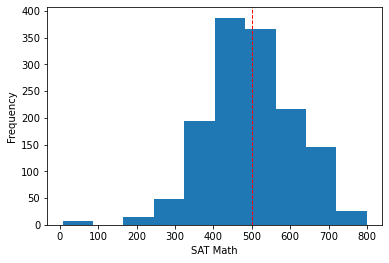

In [13]:
# Create a function to generate histograms and boxplots

ol.makeplot(nls97['satmath'], 'Histogram of SAT Math', 'SAT Math')

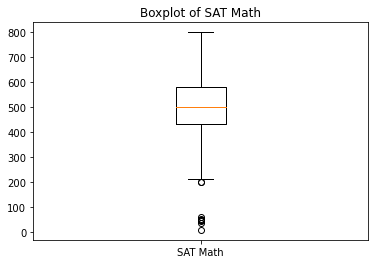

In [14]:
ol.makeplot(nls97['satmath'], 'Boxplot of SAT Math', 'SAT Math', 'box')